# Gravity Trade Model by the Pythonites - by Roisin, Yijin, Saga, Mehul, Marcus 

# $ T_{ij}  = \frac{AY_{i}Y_{j}}{D_{ij}} $ 

# Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.linear_model import LinearRegression

# Creating and importing datasets

In [2]:
df  = pd.read_excel('servicesdataset 2.xlsx', year = ['TIME'])
df1 = df
df2 = df
df

,exp,imp,year,trade,sector,contig,comlang_off,comlang_ethno,colony,comcol,...,distw,distwces,gdp_exp,gdp_imp,etcr_exp,etcr_imp,ent_cost_imp,ent_cost_exp,lat_exp,lat_imp
0,HUN,ABW,2005,0.000000,SER,0.0,0.0,0.0,0.0,0.0,...,8940.499,8939.646,5.900000e+10,NaN,2.751628,NaN,NaN,0.224284,47.50000,12.55000
1,GBR,ABW,2005,0.000000,SER,0.0,0.0,1.0,0.0,0.0,...,7480.796,7479.964,1.700000e+12,NaN,0.940455,NaN,NaN,0.007273,51.50000,12.55000
2,IRL,ABW,2005,0.000000,SER,0.0,0.0,1.0,0.0,0.0,...,7123.465,7122.625,1.300000e+11,NaN,3.073227,NaN,NaN,0.052800,53.33333,12.55000
3,ITA,ABW,2005,4.974380,SER,0.0,0.0,0.0,0.0,0.0,...,8427.789,8422.343,1.100000e+12,NaN,2.036142,NaN,NaN,0.157049,41.88334,12.55000
4,BEL,ABW,2005,2.487190,SER,0.0,1.0,1.0,0.0,0.0,...,7843.255,7843.006,2.500000e+11,NaN,2.007156,NaN,NaN,0.110991,50.83333,12.55000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31087,ITA,ZWE,2005,9.948760,SER,0.0,0.0,0.0,0.0,0.0,...,7078.592,7063.247,1.100000e+12,5.600000e+09,2.036142,NaN,0.201975,0.157049,41.88334,-17.83333
31088,LUX,ZWE,2005,0.000000,SER,0.0,0.0,0.0,0.0,0.0,...,7960.513,7959.418,2.400000e+10,5.600000e+09,2.513034,NaN,0.201975,NaN,49.60000,-17.83333
31089,DNK,ZWE,2005,4.970430,SER,0.0,0.0,0.0,0.0,0.0,...,8472.858,8471.285,1.700000e+11,5.600000e+09,1.206973,NaN,0.201975,0.000000,55.66667,-17.83333
31090,GBR,ZWE,2005,160.382187,SER,0.0,1.0,1.0,1.0,0.0,...,8491.411,8486.620,1.700000e+12,5.600000e+09,0.940455,NaN,0.201975,0.007273,51.50000,-17.83333


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31092 entries, 0 to 31091
Data columns (total 25 columns):
exp              31092 non-null object
imp              31092 non-null object
year             31092 non-null int64
trade            31092 non-null float64
sector           31092 non-null object
contig           30486 non-null float64
comlang_off      30486 non-null float64
comlang_ethno    30486 non-null float64
colony           30486 non-null float64
comcol           30486 non-null float64
curcol           30486 non-null float64
col45            30486 non-null float64
smctry           30486 non-null float64
dist             30486 non-null float64
distcap          30486 non-null float64
distw            30390 non-null float64
distwces         30390 non-null float64
gdp_exp          30101 non-null float64
gdp_imp          30100 non-null float64
etcr_exp         16844 non-null float64
etcr_imp         16781 non-null float64
ent_cost_imp     27988 non-null float64
ent_cost_exp    

In [4]:
# Printing shape of dataframe

df.shape

(31092, 25)

In [5]:
# Describing dataframe

df.describe()

,year,trade,contig,comlang_off,comlang_ethno,colony,comcol,curcol,col45,smctry,...,distw,distwces,gdp_exp,gdp_imp,etcr_exp,etcr_imp,ent_cost_imp,ent_cost_exp,lat_exp,lat_imp
count,31092.0,31092.000000,30486.000000,30486.000000,30486.000000,30486.000000,30486.000000,30486.000000,30486.000000,30486.000000,...,30390.000000,30390.000000,3.010100e+04,3.010000e+04,16844.000000,16781.000000,27988.000000,27989.000000,30800.000000,30800.000000
mean,2005.0,62.680622,0.036377,0.072886,0.077445,0.037394,0.019386,0.002165,0.018238,0.012957,...,6043.967924,6008.824055,5.537156e+11,5.535339e+11,2.194315,2.187819,0.184016,0.183782,35.623987,35.575167
std,0.0,534.976404,0.187230,0.259953,0.267301,0.189729,0.137879,0.046479,0.133813,0.113090,...,4539.006830,4549.519086,1.513057e+12,1.514375e+12,0.644012,0.636429,0.594416,0.594039,25.198081,25.235256
min,2005.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,20.251910,12.154980,7.700000e+07,7.700000e+07,0.940455,0.940455,0.000000,0.000000,-66.666660,-66.666660
25%,2005.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1758.840000,1733.363000,3.600000e+10,2.900000e+10,1.838850,1.838850,0.033883,0.033883,32.083330,32.083330
50%,2005.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5721.762000,5691.349000,1.400000e+11,1.400000e+11,2.130362,2.130362,0.094765,0.094765,44.416670,44.416670
75%,2005.0,3.730790,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,9356.068000,9330.456500,3.500000e+11,3.500000e+11,2.513034,2.513034,0.157049,0.157049,51.500000,51.500000
max,2005.0,28830.908200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,19539.480000,19537.120000,1.100000e+13,1.100000e+13,3.952876,3.952876,20.514648,20.514648,64.183330,64.183330


# Printing number of unique exporting countries

In [6]:
# Printing number of unique exporting countries

df['exp'].nunique()

218

In [7]:
# Checking for columns with null values

pd.isnull(df)

,exp,imp,year,trade,sector,contig,comlang_off,comlang_ethno,colony,comcol,...,distw,distwces,gdp_exp,gdp_imp,etcr_exp,etcr_imp,ent_cost_imp,ent_cost_exp,lat_exp,lat_imp
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,True,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31087,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
31088,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
31089,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
31090,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [8]:
# Printing out unique sectors in the sector column

df['sector'].unique()

array(['SER', 'TSP', 'FIN', 'PUB', 'ROS', 'CNS', 'TRD', 'COM', 'INS',
       'BUS'], dtype=object)

# Only keep rows with sector = SER, i.e. Services Sector

In [9]:
services_0 = df.loc[df['sector']=='SER']

In [10]:
# Removing rows with 'trade' column = 0

services_0 = services_0[services_0.trade != 0]
services_0.shape

services_0

,exp,imp,year,trade,sector,contig,comlang_off,comlang_ethno,colony,comcol,...,distw,distwces,gdp_exp,gdp_imp,etcr_exp,etcr_imp,ent_cost_imp,ent_cost_exp,lat_exp,lat_imp
3,ITA,ABW,2005,4.974380,SER,0.0,0.0,0.0,0.0,0.0,...,8427.789,8422.343,1.100000e+12,NaN,2.036142,NaN,NaN,0.157049,41.88334,12.55000
4,BEL,ABW,2005,2.487190,SER,0.0,1.0,1.0,0.0,0.0,...,7843.255,7843.006,2.500000e+11,NaN,2.007156,NaN,NaN,0.110991,50.83333,12.55000
7,FRA,ABW,2005,1.243600,SER,0.0,0.0,0.0,0.0,0.0,...,7716.752,7711.830,1.400000e+12,NaN,2.433583,NaN,NaN,0.011746,48.86666,12.55000
10,LUX,ABW,2005,1.243600,SER,0.0,0.0,0.0,0.0,0.0,...,7957.687,7957.678,2.400000e+10,NaN,2.513034,NaN,NaN,NaN,49.60000,12.55000
13,NLD,ABW,2005,87.051682,SER,0.0,1.0,1.0,1.0,0.0,...,7908.407,7908.110,4.100000e+11,NaN,1.838850,NaN,NaN,0.129677,52.35000,12.55000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31081,BEL,ZWE,2005,3.730790,SER,0.0,0.0,0.0,0.0,0.0,...,8141.413,8140.209,2.500000e+11,5.600000e+09,2.007156,NaN,0.201975,0.110991,50.83333,-17.83333
31086,NLD,ZWE,2005,9.948760,SER,0.0,0.0,0.0,0.0,0.0,...,8241.131,8239.861,4.100000e+11,5.600000e+09,1.838850,NaN,0.201975,0.129677,52.35000,-17.83333
31087,ITA,ZWE,2005,9.948760,SER,0.0,0.0,0.0,0.0,0.0,...,7078.592,7063.247,1.100000e+12,5.600000e+09,2.036142,NaN,0.201975,0.157049,41.88334,-17.83333
31089,DNK,ZWE,2005,4.970430,SER,0.0,0.0,0.0,0.0,0.0,...,8472.858,8471.285,1.700000e+11,5.600000e+09,1.206973,NaN,0.201975,0.000000,55.66667,-17.83333


# Taking log of the variables: trade, distance, GDP of export country and GDP of import country

#### $ logX_{ij} = \alpha + \beta_{1} logGDP_{i} + \beta_{2}  logGDP_{j} + \beta_{3} logdist_{ij} + e_{ij} $

In [11]:
log_trade = np.log(services_0['trade'])
log_dist = np.log(services_0['dist'])
log_GDPexp = np.log(services_0['gdp_exp'])
log_GDPimp = np.log(services_0['gdp_imp'])

In [12]:
# Adding log column values back into the dataframe (df1)

services_0['log_trade'] = log_trade
services_0['log_dist'] = log_dist
services_0['log_GDPexp'] = log_GDPexp
services_0['log_GDPimp'] = log_GDPimp

In [13]:
# New dataframe with only log values
s_log = services_0[['log_trade', 'log_dist', 'log_GDPexp', 'log_GDPimp']]

s_log = s_log.dropna()

# Adding log(GDPimp * GDPexp) to s_log

s_log['log_GDPcombined'] = s_log['log_GDPexp'] + s_log['log_GDPimp']

# Correlation coefficient

s_log.corr()

,log_trade,log_dist,log_GDPexp,log_GDPimp,log_GDPcombined
log_trade,1.000000,-0.264786,0.364688,0.373536,0.627951
log_dist,-0.264786,1.000000,0.051356,0.042931,0.080264
log_GDPexp,0.364688,0.051356,1.000000,-0.309173,0.596072
log_GDPimp,0.373536,0.042931,-0.309173,1.000000,0.579303
log_GDPcombined,0.627951,0.080264,0.596072,0.579303,1.000000


# Plotting Log GDP combined vs Log Trade with a line of best fit

In [14]:
from statistics import mean
import numpy as np

xs1 = s_log['log_GDPcombined']
ys1 = s_log['log_trade']

# Defining function
def best_fit_slope_and_intercept1(xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)*mean(xs)) - mean(xs*xs)))
    
    b = mean(ys) - m*mean(xs)
    
    return m, b



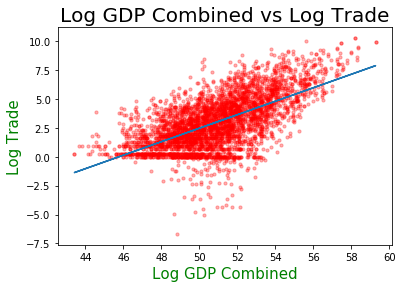

In [15]:
# Using function
m1, b1 = best_fit_slope_and_intercept1(xs1,ys1)

y_best_fit1 = [(m1*x)+b1 for x in xs1]

plt.plot(xs1, y_best_fit1)
plt.scatter(s_log['log_GDPcombined'], s_log['log_trade'], color = 'red', alpha = 0.3, s=10)

plt.title('Log GDP Combined vs Log Trade', fontsize = 20,)
plt.ylabel('Log Trade', color = 'green', size = 15)
plt.xlabel('Log GDP Combined', color = 'green', size = 15)

plt.show()

# Plotting Log Distance vs Log Trade

In [16]:
xs2 = s_log['log_dist']
ys2 = s_log['log_trade']

# Defining function
def best_fit_slope_and_intercept2(xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)*mean(xs)) - mean(xs*xs)))
    
    b = mean(ys) - m*mean(xs)
    
    return m, b



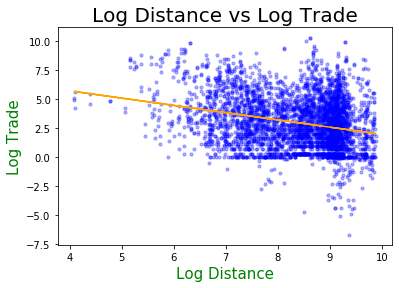

In [17]:
# Using function
m2, b2 = best_fit_slope_and_intercept2(xs2,ys2)

y_best_fit2 = [(m2*x)+b2 for x in xs2]

plt.plot(xs2, y_best_fit2, color = 'orange')
plt.scatter(s_log['log_dist'], s_log['log_trade'], color = 'blue', alpha = 0.3, s=10)

plt.title('Log Distance vs Log Trade', fontsize = 20)
plt.ylabel('Log Trade', color = 'green', size = 15)
plt.xlabel('Log Distance', color = 'green', size = 15)

plt.show()

# OLS
#### $ logX_{ij} = \alpha + \beta_{1} logGDP_{i} + \beta_{2}  logGDP_{j} + \beta_{3} logdist_{ij} + e_{ij} $

In [18]:
results = smf.ols('log_trade ~ log_GDPexp + log_GDPimp + log_dist', data=s_log).fit()
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:              log_trade   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     1265.
Date:                Sun, 23 Feb 2020   Prob (F-statistic):               0.00
Time:                        13:33:49   Log-Likelihood:                -7350.5
No. Observations:                3884   AIC:                         1.471e+04
Df Residuals:                    3880   BIC:                         1.473e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -21.7017      0.570    -38.049      0.0

# Robustifying!

In [19]:
robust_results = results.get_robustcov_results()

print(robust_results.summary())

                            OLS Regression Results                            
Dep. Variable:              log_trade   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     1385.
Date:                Sun, 23 Feb 2020   Prob (F-statistic):               0.00
Time:                        13:33:49   Log-Likelihood:                -7350.5
No. Observations:                3884   AIC:                         1.471e+04
Df Residuals:                    3880   BIC:                         1.473e+04
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -21.7017      0.547    -39.710      0.0

# Adding control variables to the regression
#### $ logX_{ij} = \alpha + \beta_{1} logGDP_{i} + \beta_{2}  logGDP_{j} 
+ \beta_{3} logdist_{ij} $ 

#### $ + \beta_{4} contig_{ij} + \beta_{5} comlang_{ij} + \beta_{6} colony_{ij} + \beta_{7} comcol_{ij} + e_{ij} $

# In addition to distance, we include a number of other trade cost observables as control variables. Specifically, we include a dummy variable equal to unity for countries that share a common land border (contig), another dummy equal to unity for those countries that share a common official language (comlang_off), a dummy equal to unity for those country pairs that were ever in a colonial relationship, and finally a dummy equal to unity for those countries that were colonized by the same power. There is evidence from the gravity model literature that each of these factors can sometimes exert a significant impact on trade flows, presumably because they increase or decrease the costs of moving goods internationally.

In [20]:
#Creating Data for OLS regression
df3 = services_0[['trade', 'dist', 'gdp_exp', 'gdp_imp', 'contig', 'comlang_off', 'colony', 'comcol']]
df3 = df3[services_0.trade != 0]

df3['log_trade'] = log_trade
df3['log_dist'] = log_dist
df3['log_GDPexp'] = log_GDPexp
df3['log_GDPimp'] = log_GDPimp

df3 = df3.dropna(axis = 0)

In [21]:
#Regression results

results1 = smf.ols('log_trade ~ log_GDPexp + log_GDPimp + log_dist + contig + comlang_off + colony + comcol' , data=df3).fit()
print(results1.summary())


                            OLS Regression Results                            
Dep. Variable:              log_trade   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     657.7
Date:                Sun, 23 Feb 2020   Prob (F-statistic):               0.00
Time:                        13:33:49   Log-Likelihood:                -7154.8
No. Observations:                3884   AIC:                         1.433e+04
Df Residuals:                    3876   BIC:                         1.438e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -22.0452      0.546    -40.354      

In [22]:
# Robust SE's

robust_results1 = results1.get_robustcov_results()

print(robust_results1.summary())

                            OLS Regression Results                            
Dep. Variable:              log_trade   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     734.3
Date:                Sun, 23 Feb 2020   Prob (F-statistic):               0.00
Time:                        13:33:49   Log-Likelihood:                -7154.8
No. Observations:                3884   AIC:                         1.433e+04
Df Residuals:                    3876   BIC:                         1.438e+04
Df Model:                           7                                         
Covariance Type:                  HC1                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -22.0452      0.522    -42.220      

# Everything is significant except comcol (whether the country was a common coloniser post 1945) is not a significant driver for trade

# Extension task: creating a dummy variable for EU countries

In [23]:
EU = ['AUT','BEL','CYP','CZE','DNK','EST','FIN','FRA','DEU','GRC','HUN','IRL','ITA','LVA','LTU','LUX','MLT','NLD','POL','PLT','SVK','SVN','ESP','SWE','GBR']

# Changing the type of the data

In [24]:
services_0['exp'] = services_0['exp'].astype(str)
services_0['imp'] = services_0['imp'].astype(str)


# Creating a dummy for whether or not exporters or importers trade with EU

In [25]:
def dummify(x):
    if x:
        return 1
    elif not x:
        return 0

# creating new column , dummy variable eu_x = 1 if exp country in EU

In [26]:
services_0['eu_x'] = services_0['exp'].isin(EU)
services_0['eu_x'] = services_0['eu_x'].apply(dummify)

In [27]:
# New data set with additional columns 
services_0

,exp,imp,year,trade,sector,contig,comlang_off,comlang_ethno,colony,comcol,...,etcr_imp,ent_cost_imp,ent_cost_exp,lat_exp,lat_imp,log_trade,log_dist,log_GDPexp,log_GDPimp,eu_x
3,ITA,ABW,2005,4.974380,SER,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.157049,41.88334,12.55000,1.604301,9.045481,27.726331,NaN,1
4,BEL,ABW,2005,2.487190,SER,0.0,1.0,1.0,0.0,0.0,...,NaN,NaN,0.110991,50.83333,12.55000,0.911154,8.967895,26.244727,NaN,1
7,FRA,ABW,2005,1.243600,SER,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.011746,48.86666,12.55000,0.218010,8.947141,27.967493,NaN,1
10,LUX,ABW,2005,1.243600,SER,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,49.60000,12.55000,0.218010,8.983153,23.901320,NaN,1
13,NLD,ABW,2005,87.051682,SER,0.0,1.0,1.0,1.0,0.0,...,NaN,NaN,0.129677,52.35000,12.55000,4.466502,8.974225,26.739423,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31081,BEL,ZWE,2005,3.730790,SER,0.0,0.0,0.0,0.0,0.0,...,NaN,0.201975,0.110991,50.83333,-17.83333,1.316620,8.996654,26.244727,22.446032,1
31086,NLD,ZWE,2005,9.948760,SER,0.0,0.0,0.0,0.0,0.0,...,NaN,0.201975,0.129677,52.35000,-17.83333,2.297448,9.013175,26.739423,22.446032,1
31087,ITA,ZWE,2005,9.948760,SER,0.0,0.0,0.0,0.0,0.0,...,NaN,0.201975,0.157049,41.88334,-17.83333,2.297448,8.841463,27.726331,22.446032,1
31089,DNK,ZWE,2005,4.970430,SER,0.0,0.0,0.0,0.0,0.0,...,NaN,0.201975,0.000000,55.66667,-17.83333,1.603506,9.031645,25.859064,22.446032,1


# Creating new column , dummy variable eu_m = 1 if imp country in EU

In [28]:
services_0['eu_m'] = services_0['imp'].isin(EU)
services_0['eu_m'] = services_0['eu_m'].apply(dummify)

In [29]:
services_0

,exp,imp,year,trade,sector,contig,comlang_off,comlang_ethno,colony,comcol,...,ent_cost_imp,ent_cost_exp,lat_exp,lat_imp,log_trade,log_dist,log_GDPexp,log_GDPimp,eu_x,eu_m
3,ITA,ABW,2005,4.974380,SER,0.0,0.0,0.0,0.0,0.0,...,NaN,0.157049,41.88334,12.55000,1.604301,9.045481,27.726331,NaN,1,0
4,BEL,ABW,2005,2.487190,SER,0.0,1.0,1.0,0.0,0.0,...,NaN,0.110991,50.83333,12.55000,0.911154,8.967895,26.244727,NaN,1,0
7,FRA,ABW,2005,1.243600,SER,0.0,0.0,0.0,0.0,0.0,...,NaN,0.011746,48.86666,12.55000,0.218010,8.947141,27.967493,NaN,1,0
10,LUX,ABW,2005,1.243600,SER,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,49.60000,12.55000,0.218010,8.983153,23.901320,NaN,1,0
13,NLD,ABW,2005,87.051682,SER,0.0,1.0,1.0,1.0,0.0,...,NaN,0.129677,52.35000,12.55000,4.466502,8.974225,26.739423,NaN,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31081,BEL,ZWE,2005,3.730790,SER,0.0,0.0,0.0,0.0,0.0,...,0.201975,0.110991,50.83333,-17.83333,1.316620,8.996654,26.244727,22.446032,1,0
31086,NLD,ZWE,2005,9.948760,SER,0.0,0.0,0.0,0.0,0.0,...,0.201975,0.129677,52.35000,-17.83333,2.297448,9.013175,26.739423,22.446032,1,0
31087,ITA,ZWE,2005,9.948760,SER,0.0,0.0,0.0,0.0,0.0,...,0.201975,0.157049,41.88334,-17.83333,2.297448,8.841463,27.726331,22.446032,1,0
31089,DNK,ZWE,2005,4.970430,SER,0.0,0.0,0.0,0.0,0.0,...,0.201975,0.000000,55.66667,-17.83333,1.603506,9.031645,25.859064,22.446032,1,0


# Multiplying the two columns, eu_x and eu_m, to form new column eu_pair
# eu_pair = 1 if both export and import country are in EU

In [30]:
services_0['eu_pair'] = services_0['eu_x'] * services_0['eu_m']

In [31]:
services_0

,exp,imp,year,trade,sector,contig,comlang_off,comlang_ethno,colony,comcol,...,ent_cost_exp,lat_exp,lat_imp,log_trade,log_dist,log_GDPexp,log_GDPimp,eu_x,eu_m,eu_pair
3,ITA,ABW,2005,4.974380,SER,0.0,0.0,0.0,0.0,0.0,...,0.157049,41.88334,12.55000,1.604301,9.045481,27.726331,NaN,1,0,0
4,BEL,ABW,2005,2.487190,SER,0.0,1.0,1.0,0.0,0.0,...,0.110991,50.83333,12.55000,0.911154,8.967895,26.244727,NaN,1,0,0
7,FRA,ABW,2005,1.243600,SER,0.0,0.0,0.0,0.0,0.0,...,0.011746,48.86666,12.55000,0.218010,8.947141,27.967493,NaN,1,0,0
10,LUX,ABW,2005,1.243600,SER,0.0,0.0,0.0,0.0,0.0,...,NaN,49.60000,12.55000,0.218010,8.983153,23.901320,NaN,1,0,0
13,NLD,ABW,2005,87.051682,SER,0.0,1.0,1.0,1.0,0.0,...,0.129677,52.35000,12.55000,4.466502,8.974225,26.739423,NaN,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31081,BEL,ZWE,2005,3.730790,SER,0.0,0.0,0.0,0.0,0.0,...,0.110991,50.83333,-17.83333,1.316620,8.996654,26.244727,22.446032,1,0,0
31086,NLD,ZWE,2005,9.948760,SER,0.0,0.0,0.0,0.0,0.0,...,0.129677,52.35000,-17.83333,2.297448,9.013175,26.739423,22.446032,1,0,0
31087,ITA,ZWE,2005,9.948760,SER,0.0,0.0,0.0,0.0,0.0,...,0.157049,41.88334,-17.83333,2.297448,8.841463,27.726331,22.446032,1,0,0
31089,DNK,ZWE,2005,4.970430,SER,0.0,0.0,0.0,0.0,0.0,...,0.000000,55.66667,-17.83333,1.603506,9.031645,25.859064,22.446032,1,0,0


# create s_log3, adding EU dummy to original + control regressors

In [32]:
s_log3 = services_0[['log_trade','log_dist','log_GDPexp','log_GDPimp','contig','comlang_off','colony','comcol','eu_pair']]
s_log3=s_log3.dropna()


In [33]:
s_log3


,log_trade,log_dist,log_GDPexp,log_GDPimp,contig,comlang_off,colony,comcol,eu_pair
28,5.152221,8.830191,28.161649,23.431316,0.0,0.0,0.0,0.0,0
30,2.520591,8.638569,27.726331,23.431316,0.0,0.0,0.0,0.0,0
32,3.212943,8.878924,25.859064,23.431316,0.0,0.0,0.0,0.0,0
34,4.312351,8.781144,27.967493,23.431316,0.0,0.0,0.0,0.0,0
37,2.009766,8.809300,26.244727,23.431316,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...
31081,1.316620,8.996654,26.244727,22.446032,0.0,0.0,0.0,0.0,0
31086,2.297448,9.013175,26.739423,22.446032,0.0,0.0,0.0,0.0,0
31087,2.297448,8.841463,27.726331,22.446032,0.0,0.0,0.0,0.0,0
31089,1.603506,9.031645,25.859064,22.446032,0.0,0.0,0.0,0.0,0


# regression with dummy

In [34]:
results3 = smf.ols('log_trade ~ log_GDPexp + log_GDPimp + log_dist + contig + comlang_off + colony + comcol + eu_pair', data=s_log3).fit()
print(results3.summary())



                            OLS Regression Results                            
Dep. Variable:              log_trade   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     579.1
Date:                Sun, 23 Feb 2020   Prob (F-statistic):               0.00
Time:                        13:33:50   Log-Likelihood:                -7147.8
No. Observations:                3884   AIC:                         1.431e+04
Df Residuals:                    3875   BIC:                         1.437e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -22.4500      0.556    -40.367      

In [35]:
# making this regression robust
robust_results3 = results3.get_robustcov_results()
print(robust_results3.summary())
# we find that being in EU is statistically significant

                            OLS Regression Results                            
Dep. Variable:              log_trade   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     658.4
Date:                Sun, 23 Feb 2020   Prob (F-statistic):               0.00
Time:                        13:33:50   Log-Likelihood:                -7147.8
No. Observations:                3884   AIC:                         1.431e+04
Df Residuals:                    3875   BIC:                         1.437e+04
Df Model:                           8                                         
Covariance Type:                  HC1                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -22.4500      0.527    -42.608      